# Correlation analysis

This notebook demonstrates how to calculate the correlation between two RSP profiles.

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ipynb.fs.full.biorsp import (
    find_foreground_background_points,
    calculate_differences,
    convert_to_polar,
)

In [145]:
dge_matrix = pd.read_csv("data/MCA2_filtered.dge.txt", sep="\t", index_col=0)
tsne_results = pd.read_csv("embeddings/tsne_results.csv").to_numpy()
dbscan_results = pd.read_csv("embeddings/tsne_dbscan_results.csv")

In [146]:
gene_name_1 = "Tnnt2"  # Change this to your first gene of interest
gene_name_2 = "Actc1"  # Change this to your second gene of interest
threshold = 1  # Define the threshold for foreground points
clusters = [1]  # Define the clusters to be considered as foreground

# bioRSP-specific parameters
scanning_window = np.pi
resolution = 1000
angle_range = np.array([0, 2 * np.pi])
mode = "absolute"

In [147]:
# Extract foreground and background points for the first gene
foreground_points_1, background_points = find_foreground_background_points(
    gene_name=gene_name_1,
    dge_matrix=dge_matrix,
    tsne_results=tsne_results,
    threshold=threshold,
    dbscan_df=dbscan_results,
    selected_clusters=clusters,
)

# Extract foreground and background points for the second gene
# Background points for the second gene are the same as the first gene
foreground_points_2, _ = find_foreground_background_points(
    gene_name=gene_name_2,
    dge_matrix=dge_matrix,
    tsne_results=tsne_results,
    threshold=threshold,
    dbscan_df=dbscan_results,
    selected_clusters=clusters,
)

In [148]:
# Calculate vantage points
vantage_point = background_points.mean(axis=0)

In [149]:
# Convert to polar coordinates
fg_r_1, fg_theta_1 = convert_to_polar(foreground_points_1, vantage_point)
fg_r_2, fg_theta_2 = convert_to_polar(foreground_points_2, vantage_point)
bg_r, bg_theta = convert_to_polar(background_points, vantage_point)

In [150]:
# Calculate RSP differences for each gene
coverage = len(foreground_points_1) / len(background_points)
print(f"Coverage: {coverage}")

differences_1 = calculate_differences(
    foreground_points=foreground_points_1,
    background_points=background_points,
    scanning_window=scanning_window,
    resolution=resolution,
    vantage_point=vantage_point,
    angle_range=angle_range,
    mode=mode,
)

coverage = len(foreground_points_2) / len(background_points)
print(f"Coverage: {coverage}")

differences_2 = calculate_differences(
    foreground_points=foreground_points_2,
    background_points=background_points,
    scanning_window=scanning_window,
    resolution=resolution,
    vantage_point=vantage_point,
    angle_range=angle_range,
    mode=mode,
)

Coverage: 0.9561855670103093
Coverage: 0.9278350515463918


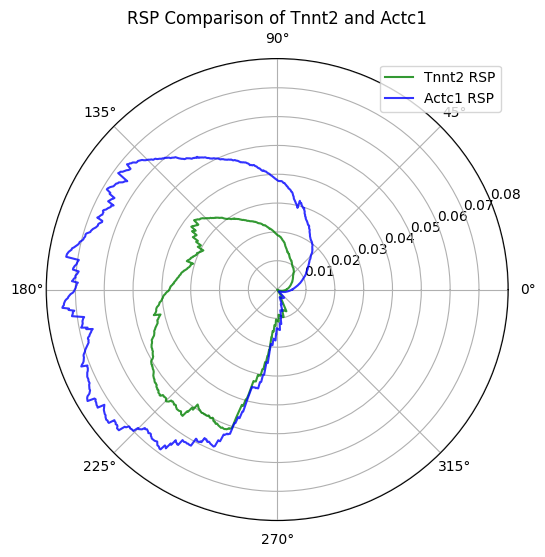

In [151]:
# Plot RSP curves for both genes on the same graph
plt.figure(figsize=(8, 6))
plt.subplot(polar=True)

plt.plot(
    np.linspace(0, 2 * np.pi, 1000),
    differences_1,
    color="green",
    label=f"{gene_name_1} RSP",
    alpha=0.8,
)
plt.plot(
    np.linspace(0, 2 * np.pi, 1000),
    differences_2,
    color="blue",
    label=f"{gene_name_2} RSP",
    alpha=0.8,
)

# plt.ylim(0, 1)
plt.legend()
plt.title(f"RSP Comparison of {gene_name_1} and {gene_name_2}")
plt.show()